In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [4]:
from scipy import misc
image = misc.imread("pixel_em/10workers_rand0/obj1/EM_mask_thresh0.png")

In [7]:
import pickle as pkl

In [19]:
mega_mask = pkl.load(open("pixel_em/10workers_rand0/obj10/gt_est_mask_2_thresh-10.pkl"))

In [26]:
from shapely import geometry

In [29]:
def mask_to_tiles(mega_mask):
    # Create masks for single valued tiles (so that they are more disconnected)
    from matplotlib import _cntr as cntr
    tiles = [] # list of coordinates of all the tiles extracted
    unique_tile_values = np.unique(mega_mask)
    # print unique_tile_values
    for tile_value in unique_tile_values[1:]: #exclude 0
        singly_masked_img = np.zeros_like(mega_mask)
        for x,y in zip(*np.where(mega_mask==tile_value)):
            singly_masked_img[x][y]=1
        #Extract a set of contours from these masks
        x, y = np.mgrid[:singly_masked_img.shape[0], :singly_masked_img.shape[1]]
        c = cntr.Cntr(x, y, singly_masked_img)
        # trace a contour at z ~= 1
        res = c.trace(0.9)
        #if PLOT: plot_trace_contours(singly_masked_img,res)
        for segment in res:
            if segment.dtype!=np.uint8 and len(segment)>2:
                #Take the transpose of the tile graph polygon because during the tile creation process the xy was flipped
                tile= Polygon(zip(segment[:,1],segment[:,0]))
                # print tile.area
                # if tile.area>=1: #FOR DEBUGGING PURPOSES
                tiles.append(shapely.geometry.Polygon(segment))
    return tiles

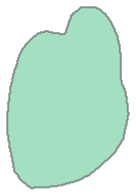

In [27]:
shapely.geometry.Polygon(tiles[0])

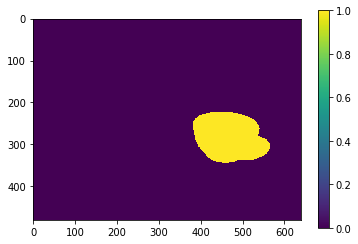

In [15]:
plt.imshow(img)
plt.colorbar()

In [31]:
tiles = mask_to_tiles(mega_mask)

In [33]:
import glob

In [37]:
from tqdm import tqdm

In [42]:
disjoint_fname  =[]
for fname in tqdm(glob.glob("pixel_em/*/obj*/gt_est_mask_4_thresh*.pkl")):
    #mega_mask = pkl.load(open("pixel_em/10workers_rand0/obj10/gt_est_mask_2_thresh-10.pkl"))
    mega_mask = pkl.load(open(fname))
    tiles = mask_to_tiles(mega_mask)
    if len(tiles)!=1:
        print len(tiles)
        print fname
        disjoint_fname.append(fname)

  0%|          | 8/10199 [00:00<11:43, 14.48it/s]

2
pixel_em/5workers_rand0/obj1/gt_est_mask_4_thresh4.pkl
5
pixel_em/5workers_rand0/obj1/gt_est_mask_4_thresh10.pkl


  0%|          | 22/10199 [00:01<10:56, 15.50it/s]

2
pixel_em/5workers_rand0/obj13/gt_est_mask_4_thresh10.pkl
2
pixel_em/5workers_rand0/obj14/gt_est_mask_4_thresh2.pkl


  0%|          | 26/10199 [00:01<11:03, 15.33it/s]

2
pixel_em/5workers_rand0/obj14/gt_est_mask_4_thresh-2.pkl
2
pixel_em/5workers_rand0/obj14/gt_est_mask_4_thresh0.pkl


  0%|          | 50/10199 [00:03<10:44, 15.75it/s]

0
pixel_em/5workers_rand0/obj8/gt_est_mask_4_thresh10.pkl
0
pixel_em/5workers_rand0/obj8/gt_est_mask_4_thresh-10.pkl


  1%|          | 94/10199 [00:06<11:02, 15.26it/s]

2
pixel_em/5workers_rand0/obj12/gt_est_mask_4_thresh2.pkl
2
pixel_em/5workers_rand0/obj12/gt_est_mask_4_thresh-2.pkl


  1%|          | 96/10199 [00:06<11:07, 15.14it/s]

2
pixel_em/5workers_rand0/obj12/gt_est_mask_4_thresh0.pkl


  1%|          | 112/10199 [00:07<11:49, 14.22it/s]

2
pixel_em/5workers_rand0/obj16/gt_est_mask_4_thresh10.pkl


  1%|▏         | 141/10199 [00:09<11:49, 14.17it/s]

0
pixel_em/5workers_rand0/obj20/gt_est_mask_4_thresh10.pkl
0
pixel_em/5workers_rand0/obj20/gt_est_mask_4_thresh-10.pkl


  2%|▏         | 171/10199 [00:13<13:25, 12.45it/s]

2
pixel_em/5workers_rand0/obj25/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand0/obj25/gt_est_mask_4_thresh-2.pkl


  2%|▏         | 174/10199 [00:14<13:34, 12.30it/s]

2
pixel_em/5workers_rand0/obj25/gt_est_mask_4_thresh4.pkl
0
pixel_em/5workers_rand0/obj25/gt_est_mask_4_thresh10.pkl
0
pixel_em/5workers_rand0/obj25/gt_est_mask_4_thresh-10.pkl


  2%|▏         | 192/10199 [00:18<16:02, 10.39it/s]

3
pixel_em/5workers_rand0/obj28/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand0/obj28/gt_est_mask_4_thresh-2.pkl


  2%|▏         | 195/10199 [00:18<16:02, 10.39it/s]

2
pixel_em/5workers_rand0/obj28/gt_est_mask_4_thresh4.pkl


  2%|▏         | 198/10199 [00:19<16:04, 10.37it/s]

2
pixel_em/5workers_rand0/obj28/gt_est_mask_4_thresh-10.pkl
3
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh2.pkl
2
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh-4.pkl


  2%|▏         | 201/10199 [00:19<16:05, 10.35it/s]

2
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh-2.pkl
3
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh4.pkl
0
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh10.pkl
0
pixel_em/5workers_rand0/obj29/gt_est_mask_4_thresh-10.pkl


  2%|▏         | 204/10199 [00:19<16:05, 10.36it/s]

2
pixel_em/5workers_rand0/obj30/gt_est_mask_4_thresh2.pkl


  2%|▏         | 207/10199 [00:19<16:04, 10.36it/s]

2
pixel_em/5workers_rand0/obj30/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand0/obj30/gt_est_mask_4_thresh4.pkl


  2%|▏         | 210/10199 [00:20<16:18, 10.21it/s]

2
pixel_em/5workers_rand0/obj30/gt_est_mask_4_thresh-10.pkl


  2%|▏         | 234/10199 [00:23<16:28, 10.08it/s]

2
pixel_em/5workers_rand0/obj34/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand0/obj34/gt_est_mask_4_thresh-2.pkl


  2%|▏         | 246/10199 [00:24<16:45,  9.90it/s]

0
pixel_em/5workers_rand0/obj35/gt_est_mask_4_thresh10.pkl
0
pixel_em/5workers_rand0/obj35/gt_est_mask_4_thresh-10.pkl


  3%|▎         | 264/10199 [00:26<16:40,  9.93it/s]

2
pixel_em/5workers_rand0/obj38/gt_est_mask_4_thresh4.pkl


  4%|▍         | 387/10199 [00:36<15:19, 10.67it/s]

0
pixel_em/5workers_rand8/obj8/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj8/gt_est_mask_4_thresh10.pkl


  4%|▍         | 441/10199 [00:40<14:46, 11.01it/s]

2
pixel_em/5workers_rand8/obj16/gt_est_mask_4_thresh10.pkl


  4%|▍         | 456/10199 [00:41<14:45, 11.00it/s]

0
pixel_em/5workers_rand8/obj18/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj18/gt_est_mask_4_thresh10.pkl


  5%|▍         | 471/10199 [00:42<14:37, 11.09it/s]

0
pixel_em/5workers_rand8/obj20/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj20/gt_est_mask_4_thresh10.pkl


  5%|▍         | 504/10199 [00:46<14:58, 10.79it/s]

0
pixel_em/5workers_rand8/obj25/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj25/gt_est_mask_4_thresh10.pkl


  5%|▌         | 522/10199 [00:49<15:08, 10.65it/s]

2
pixel_em/5workers_rand8/obj28/gt_est_mask_4_thresh-2.pkl
2
pixel_em/5workers_rand8/obj28/gt_est_mask_4_thresh0.pkl


  5%|▌         | 525/10199 [00:49<15:08, 10.65it/s]

2
pixel_em/5workers_rand8/obj29/gt_est_mask_4_thresh2.pkl


  5%|▌         | 531/10199 [00:49<15:10, 10.62it/s]

3
pixel_em/5workers_rand8/obj29/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj29/gt_est_mask_4_thresh10.pkl


  5%|▌         | 534/10199 [00:50<15:11, 10.61it/s]

2
pixel_em/5workers_rand8/obj30/gt_est_mask_4_thresh2.pkl


  5%|▌         | 537/10199 [00:50<15:12, 10.59it/s]

2
pixel_em/5workers_rand8/obj30/gt_est_mask_4_thresh0.pkl


  5%|▌         | 540/10199 [00:51<15:12, 10.58it/s]

2
pixel_em/5workers_rand8/obj30/gt_est_mask_4_thresh10.pkl


  6%|▌         | 561/10199 [00:53<15:17, 10.51it/s]

2
pixel_em/5workers_rand8/obj34/gt_est_mask_4_thresh2.pkl


  6%|▌         | 567/10199 [00:54<15:18, 10.49it/s]

2
pixel_em/5workers_rand8/obj34/gt_est_mask_4_thresh4.pkl
0
pixel_em/5workers_rand8/obj34/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj34/gt_est_mask_4_thresh10.pkl


  6%|▌         | 570/10199 [00:54<15:20, 10.46it/s]

4
pixel_em/5workers_rand8/obj35/gt_est_mask_4_thresh-2.pkl


  6%|▌         | 573/10199 [00:54<15:22, 10.44it/s]

0
pixel_em/5workers_rand8/obj35/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand8/obj35/gt_est_mask_4_thresh10.pkl


  6%|▌         | 576/10199 [00:55<15:22, 10.43it/s]

2
pixel_em/5workers_rand8/obj36/gt_est_mask_4_thresh-4.pkl


  6%|▌         | 603/10199 [00:58<15:24, 10.37it/s]

2
pixel_em/5workers_rand8/obj39/gt_est_mask_4_thresh-10.pkl


  6%|▌         | 630/10199 [01:00<15:19, 10.40it/s]

2
pixel_em/5workers_rand8/obj43/gt_est_mask_4_thresh10.pkl


  7%|▋         | 666/10199 [01:03<15:15, 10.41it/s]

2
pixel_em/5workers_rand9/obj1/gt_est_mask_4_thresh10.pkl


  7%|▋         | 687/10199 [01:05<15:11, 10.44it/s]

2
pixel_em/5workers_rand9/obj4/gt_est_mask_4_thresh10.pkl


  7%|▋         | 714/10199 [01:08<15:07, 10.45it/s]

0
pixel_em/5workers_rand9/obj8/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj8/gt_est_mask_4_thresh10.pkl


  7%|▋         | 735/10199 [01:10<15:06, 10.44it/s]

2
pixel_em/5workers_rand9/obj11/gt_est_mask_4_thresh-10.pkl


  7%|▋         | 750/10199 [01:12<15:07, 10.42it/s]

2
pixel_em/5workers_rand9/obj14/gt_est_mask_4_thresh2.pkl
2
pixel_em/5workers_rand9/obj14/gt_est_mask_4_thresh-2.pkl


  7%|▋         | 753/10199 [01:12<15:06, 10.41it/s]

2
pixel_em/5workers_rand9/obj14/gt_est_mask_4_thresh0.pkl


  8%|▊         | 783/10199 [01:14<15:01, 10.45it/s]

0
pixel_em/5workers_rand9/obj18/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj18/gt_est_mask_4_thresh10.pkl


  8%|▊         | 834/10199 [01:21<15:15, 10.23it/s]

2
pixel_em/5workers_rand9/obj26/gt_est_mask_4_thresh-4.pkl


  8%|▊         | 852/10199 [01:24<15:26, 10.09it/s]

3
pixel_em/5workers_rand9/obj28/gt_est_mask_4_thresh4.pkl


  8%|▊         | 855/10199 [01:24<15:27, 10.07it/s]

3
pixel_em/5workers_rand9/obj28/gt_est_mask_4_thresh10.pkl
6
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh2.pkl


  8%|▊         | 858/10199 [01:25<15:27, 10.07it/s]

2
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh-2.pkl
6
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh0.pkl


  8%|▊         | 861/10199 [01:25<15:26, 10.08it/s]

7
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh4.pkl
3
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj29/gt_est_mask_4_thresh10.pkl


  9%|▊         | 867/10199 [01:25<15:24, 10.09it/s]

3
pixel_em/5workers_rand9/obj30/gt_est_mask_4_thresh4.pkl
4
pixel_em/5workers_rand9/obj30/gt_est_mask_4_thresh10.pkl


  9%|▊         | 876/10199 [01:26<15:23, 10.09it/s]

2
pixel_em/5workers_rand9/obj31/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj31/gt_est_mask_4_thresh10.pkl


  9%|▉         | 903/10199 [01:29<15:24, 10.05it/s]

0
pixel_em/5workers_rand9/obj35/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj35/gt_est_mask_4_thresh10.pkl


  9%|▉         | 927/10199 [01:32<15:22, 10.06it/s]

2
pixel_em/5workers_rand9/obj39/gt_est_mask_4_thresh-4.pkl


  9%|▉         | 930/10199 [01:32<15:22, 10.05it/s]

0
pixel_em/5workers_rand9/obj39/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand9/obj39/gt_est_mask_4_thresh10.pkl


  9%|▉         | 960/10199 [01:34<15:14, 10.11it/s]

2
pixel_em/5workers_rand9/obj44/gt_est_mask_4_thresh2.pkl


  9%|▉         | 963/10199 [01:35<15:13, 10.11it/s]

2
pixel_em/5workers_rand9/obj44/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand9/obj44/gt_est_mask_4_thresh4.pkl


 10%|▉         | 999/10199 [01:38<15:08, 10.13it/s]

2
pixel_em/5workers_rand6/obj2/gt_est_mask_4_thresh4.pkl


 10%|█         | 1023/10199 [01:40<15:05, 10.14it/s]

2
pixel_em/5workers_rand6/obj5/gt_est_mask_4_thresh10.pkl


 10%|█         | 1044/10199 [01:42<15:02, 10.15it/s]

0
pixel_em/5workers_rand6/obj8/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand6/obj8/gt_est_mask_4_thresh10.pkl


 12%|█▏        | 1182/10199 [01:57<14:55, 10.06it/s]

0
pixel_em/5workers_rand6/obj28/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand6/obj28/gt_est_mask_4_thresh10.pkl


 12%|█▏        | 1185/10199 [01:57<14:55, 10.07it/s]

2
pixel_em/5workers_rand6/obj29/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand6/obj29/gt_est_mask_4_thresh-2.pkl


 12%|█▏        | 1188/10199 [01:58<14:55, 10.06it/s]

3
pixel_em/5workers_rand6/obj29/gt_est_mask_4_thresh4.pkl
3
pixel_em/5workers_rand6/obj29/gt_est_mask_4_thresh-10.pkl


 12%|█▏        | 1191/10199 [01:58<14:55, 10.06it/s]

0
pixel_em/5workers_rand6/obj29/gt_est_mask_4_thresh10.pkl


 12%|█▏        | 1224/10199 [02:02<14:55, 10.02it/s]

0
pixel_em/5workers_rand6/obj34/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand6/obj34/gt_est_mask_4_thresh10.pkl


 12%|█▏        | 1227/10199 [02:02<14:57, 10.00it/s]

3
pixel_em/5workers_rand6/obj35/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand6/obj35/gt_est_mask_4_thresh-2.pkl


 12%|█▏        | 1230/10199 [02:03<14:58,  9.99it/s]

2
pixel_em/5workers_rand6/obj35/gt_est_mask_4_thresh0.pkl
0
pixel_em/5workers_rand6/obj35/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand6/obj35/gt_est_mask_4_thresh10.pkl


 12%|█▏        | 1233/10199 [02:03<14:58,  9.98it/s]

2
pixel_em/5workers_rand6/obj36/gt_est_mask_4_thresh-4.pkl


 12%|█▏        | 1266/10199 [02:07<14:56,  9.96it/s]

2
pixel_em/5workers_rand6/obj40/gt_est_mask_4_thresh4.pkl


 13%|█▎        | 1275/10199 [02:07<14:55,  9.97it/s]

2
pixel_em/5workers_rand6/obj41/gt_est_mask_4_thresh10.pkl


 13%|█▎        | 1290/10199 [02:09<14:52,  9.98it/s]

3
pixel_em/5workers_rand6/obj44/gt_est_mask_4_thresh2.pkl
3
pixel_em/5workers_rand6/obj44/gt_est_mask_4_thresh-2.pkl


 13%|█▎        | 1293/10199 [02:09<14:52,  9.98it/s]

3
pixel_em/5workers_rand6/obj44/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand6/obj44/gt_est_mask_4_thresh4.pkl


 13%|█▎        | 1323/10199 [02:12<14:49,  9.98it/s]

2
pixel_em/5workers_rand7/obj1/gt_est_mask_4_thresh10.pkl


 13%|█▎        | 1326/10199 [02:12<14:49,  9.98it/s]

2
pixel_em/5workers_rand7/obj2/gt_est_mask_4_thresh-4.pkl


 13%|█▎        | 1371/10199 [02:17<14:44,  9.99it/s]

0
pixel_em/5workers_rand7/obj8/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand7/obj8/gt_est_mask_4_thresh10.pkl


 14%|█▍        | 1425/10199 [02:22<14:38,  9.99it/s]

2
pixel_em/5workers_rand7/obj16/gt_est_mask_4_thresh-4.pkl


 14%|█▍        | 1455/10199 [02:25<14:31, 10.03it/s]

0
pixel_em/5workers_rand7/obj20/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand7/obj20/gt_est_mask_4_thresh10.pkl


 15%|█▍        | 1485/10199 [02:29<14:34,  9.96it/s]

2
pixel_em/5workers_rand7/obj25/gt_est_mask_4_thresh-4.pkl


 15%|█▍        | 1494/10199 [02:30<14:36,  9.93it/s]

2
pixel_em/5workers_rand7/obj26/gt_est_mask_4_thresh-4.pkl


 15%|█▍        | 1506/10199 [02:32<14:37,  9.91it/s]

2
pixel_em/5workers_rand7/obj28/gt_est_mask_4_thresh2.pkl
2
pixel_em/5workers_rand7/obj28/gt_est_mask_4_thresh-2.pkl


 15%|█▍        | 1509/10199 [02:32<14:37,  9.91it/s]

2
pixel_em/5workers_rand7/obj28/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand7/obj28/gt_est_mask_4_thresh4.pkl


 15%|█▍        | 1512/10199 [02:32<14:36,  9.91it/s]

3
pixel_em/5workers_rand7/obj29/gt_est_mask_4_thresh2.pkl
8
pixel_em/5workers_rand7/obj29/gt_est_mask_4_thresh-4.pkl


 15%|█▍        | 1515/10199 [02:32<14:36,  9.90it/s]

3
pixel_em/5workers_rand7/obj29/gt_est_mask_4_thresh-2.pkl
3
pixel_em/5workers_rand7/obj29/gt_est_mask_4_thresh0.pkl


 15%|█▍        | 1518/10199 [02:33<14:36,  9.90it/s]

2
pixel_em/5workers_rand7/obj29/gt_est_mask_4_thresh4.pkl


 15%|█▍        | 1521/10199 [02:33<14:36,  9.90it/s]

2
pixel_em/5workers_rand7/obj30/gt_est_mask_4_thresh2.pkl
2
pixel_em/5workers_rand7/obj30/gt_est_mask_4_thresh-2.pkl


 15%|█▍        | 1524/10199 [02:33<14:36,  9.90it/s]

2
pixel_em/5workers_rand7/obj30/gt_est_mask_4_thresh0.pkl
2
pixel_em/5workers_rand7/obj30/gt_est_mask_4_thresh4.pkl


 15%|█▍        | 1527/10199 [02:34<14:35,  9.90it/s]

2
pixel_em/5workers_rand7/obj30/gt_est_mask_4_thresh10.pkl


 15%|█▌        | 1554/10199 [02:37<14:34,  9.89it/s]

0
pixel_em/5workers_rand7/obj34/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand7/obj34/gt_est_mask_4_thresh10.pkl


 15%|█▌        | 1557/10199 [02:37<14:35,  9.88it/s]

3
pixel_em/5workers_rand7/obj35/gt_est_mask_4_thresh-4.pkl
2
pixel_em/5workers_rand7/obj35/gt_est_mask_4_thresh-2.pkl


 15%|█▌        | 1560/10199 [02:38<14:35,  9.86it/s]

0
pixel_em/5workers_rand7/obj35/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand7/obj35/gt_est_mask_4_thresh10.pkl


 15%|█▌        | 1563/10199 [02:38<14:35,  9.86it/s]

2
pixel_em/5workers_rand7/obj36/gt_est_mask_4_thresh-4.pkl


 16%|█▌        | 1584/10199 [02:40<14:33,  9.86it/s]

2
pixel_em/5workers_rand7/obj39/gt_est_mask_4_thresh-4.pkl


 16%|█▌        | 1596/10199 [02:41<14:32,  9.85it/s]

4
pixel_em/5workers_rand7/obj40/gt_est_mask_4_thresh-10.pkl


 16%|█▌        | 1608/10199 [02:42<14:30,  9.87it/s]

2
pixel_em/5workers_rand7/obj42/gt_est_mask_4_thresh-10.pkl


 16%|█▌        | 1620/10199 [02:44<14:29,  9.87it/s]

2
pixel_em/5workers_rand7/obj44/gt_est_mask_4_thresh-4.pkl


 16%|█▌        | 1644/10199 [02:46<14:25,  9.88it/s]

2
pixel_em/5workers_rand7/obj47/gt_est_mask_4_thresh-10.pkl
0
pixel_em/5workers_rand7/obj47/gt_est_mask_4_thresh10.pkl


 16%|█▌        | 1650/10199 [02:46<14:25,  9.88it/s]

2
pixel_em/5workers_rand4/obj1/gt_est_mask_4_thresh10.pkl


 16%|█▌        | 1656/10199 [02:47<14:25,  9.87it/s]

3
pixel_em/5workers_rand4/obj2/gt_est_mask_4_thresh4.pkl


 17%|█▋        | 1689/10199 [02:51<14:21,  9.87it/s]

KeyboardInterrupt: 

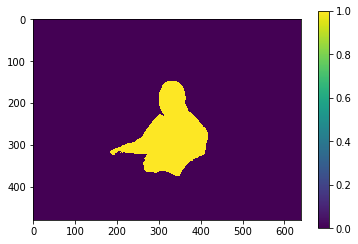

In [47]:
mega_mask=pkl.load(open("pixel_em/5workers_rand0/obj1/gt_est_mask_4_thresh10.pkl"))

plt.imshow(mega_mask)
plt.colorbar()


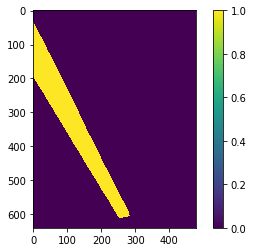

In [46]:
mega_mask=pkl.load(open("pixel_em/5workers_rand7/obj36/gt_est_mask_4_thresh-4.pkl"))

plt.imshow(mega_mask)
plt.colorbar()

In [ ]:
disjoint_mv_fname  =[]
for fname in tqdm(glob.glob("pixel_em/*/obj*/MV_mask.pkl")):
    #mega_mask = pkl.load(open("pixel_em/10workers_rand0/obj10/gt_est_mask_2_thresh-10.pkl"))
    mega_mask = pkl.load(open(fname))
    tiles = mask_to_tiles(mega_mask)
    if len(tiles)!=1:
        print len(tiles)
        print fname
        disjoint_mv_fname.append(fname)

# PRJ for TileEM 

In [58]:
objid=1
thresh = 2
tiles = pkl.load(open("uniqueTiles/5workers_rand6/vtiles{}.pkl".format(objid)))
Tstar_idx_lst = list(set(pkl.load(open("uniqueTiles/5workers_rand6/obj25/thresh0/iter_5/tid_list.pkl"))))

In [59]:
Tstar_lst = [tiles[tidx] for tidx in Tstar_idx_lst]

In [56]:
print Tstar_idx_lst

[0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15, 16, 18, 19, 21, 31, 32, 33, 42, 47, 48, 50, 51, 52, 53, 54, 57]


In [62]:
from shapely.ops import cascaded_union

In [ ]:
def prj_from_list(test_list, base_poly):
    int_area = 0.0
    test_poly_area = 0.0
    for test_poly in test_list:
        #print test_poly
        #print base_poly
        int_area += intersection_area(test_poly, base_poly)
        test_poly_area += test_poly.area
    precision = (int_area / test_poly_area) if (test_poly_area != 0) else 0
    recall = (int_area / base_poly.area) if (base_poly.area != 0) else 0
    jaccard = (int_area / (base_poly.area+test_poly_area-int_area)) if (test_poly.area != 0) else 0
    return precision,recall,jaccard

In [ ]:
def jaccard(obj_x_locs,obj_y_locs):
    return intersection(obj_x_locs,obj_y_locs)/union(obj_x_locs,obj_y_locs)
from shapely.geometry import box,Polygon
def intersection(obj_x_locs,obj_y_locs,debug=False):
    # Compute intersecting area
    polygon1 = Polygon(zip(obj_x_locs[0],obj_y_locs[0])).buffer(0)
    polygon2 = Polygon(zip(obj_x_locs[1],obj_y_locs[1])).buffer(0)
    if debug : plt.imshow(polygon1.intersection(polygon2),interpolation="None")
    return polygon1.intersection(polygon2).area
def union(obj_x_locs,obj_y_locs,debug=False):
    # Compute union area of two given polygon
    polygon1 = Polygon(zip(obj_x_locs[0],obj_y_locs[0])).buffer(0)
    polygon2 = Polygon(zip(obj_x_locs[1],obj_y_locs[1])).buffer(0)
    if debug : plt.imshow(polygon1.union(polygon2),interpolation="None")
    return polygon1.union(polygon2).area
def precision(obj_x_locs,obj_y_locs):
    worker_bb = Polygon(zip(obj_x_locs[0],obj_y_locs[0]))
    worker_bb_area  = worker_bb.area
#     print "Intersection: ", intersection(obj_x_locs,obj_y_locs)
#     print "Worker BB area: ",worker_bb_area
    return intersection(obj_x_locs,obj_y_locs)/float(worker_bb_area)